### Exploratory Data Analysis

### Unvariate: Distpolot,

### Bivariate: Boxplot, t-test

### Multivariate: anova, scatterplot

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
hdf = pd.read_csv("C://Users//Sudipta//Downloads//housesalesprediction//kc_house_data.csv",parse_dates= ['date'])
print("Data shape: ", hdf.shape)
hdf.head()

Data shape:  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
hdf.drop('id',axis=1,inplace=True)

In [9]:
hdf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
hdf.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
hdf['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [16]:
hdf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
hdf[hdf['bedrooms'] > 5]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
209,2014-07-17,464000.0,6,3.00,2300,3404,2.0,0,0,3,7,1600,700,1920,1994,98133,47.7067,-122.343,1560,1312
232,2014-11-21,315000.0,6,2.75,2940,7350,1.0,0,0,3,8,1780,1160,1978,0,98023,47.3103,-122.339,2120,8236
239,2014-05-29,472000.0,6,2.50,4410,14034,1.0,0,2,4,9,2350,2060,1965,0,98003,47.3376,-122.324,2600,13988
331,2015-04-16,279000.0,6,1.75,2240,11180,2.0,0,0,4,7,2240,0,1955,0,98198,47.4200,-122.323,1590,7955
486,2014-07-11,1067000.0,6,3.50,4860,11793,2.0,0,0,3,11,3860,1000,1998,0,98006,47.5521,-122.137,3600,11793
527,2014-06-18,1600000.0,6,5.00,6050,230652,2.0,0,3,3,11,6050,0,2001,0,98024,47.6033,-121.943,4210,233971
556,2014-06-20,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
558,2015-04-27,750000.0,6,1.75,2750,9563,2.0,0,0,4,8,2750,0,1973,0,98052,47.6368,-122.097,2040,9563
717,2014-07-28,452000.0,6,2.25,2660,13579,2.0,0,0,3,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242
718,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0,0,3,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242


In [20]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

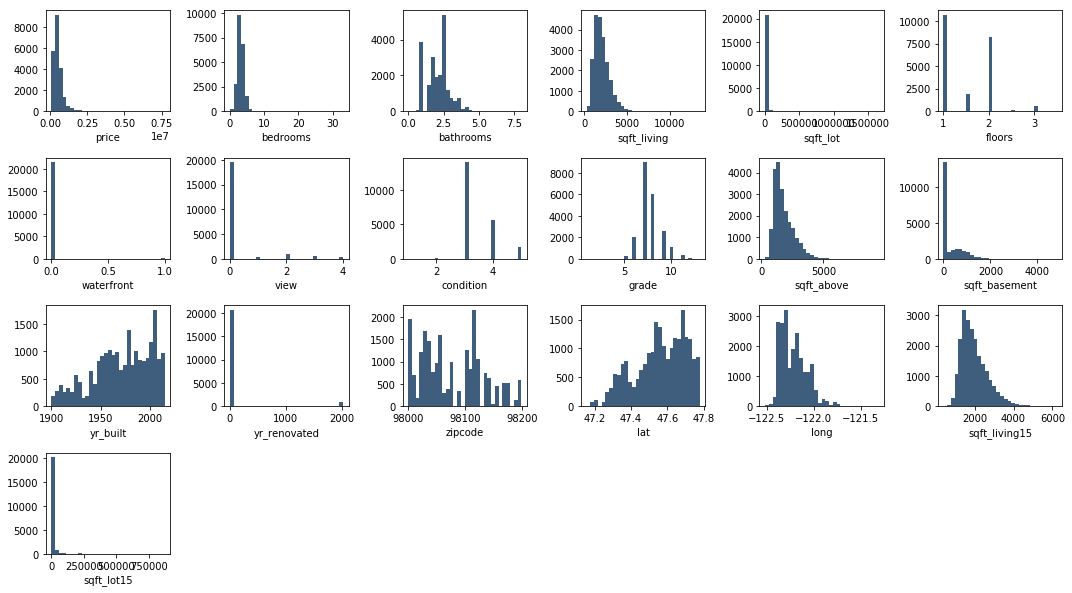

In [25]:
fig = plt.figure(figsize=(15, 12))

# loop over all vars (total: 34)
for i in range(1, hdf.shape[1]):
    plt.subplot(6, 6, i)
    f = plt.gca()
       
    vals = np.size(hdf.iloc[:, i].unique())
    if vals < 10:
        bins = vals
    else:
        vals = 10

    plt.hist(hdf.iloc[:, i], bins=30, color='#3F5D7D')
    plt.xlabel(hdf.columns[i]) 
plt.tight_layout()


In [29]:
hdf[hdf['yr_renovated'] != 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
35,2014-06-13,696000.0,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264
95,2014-09-08,905000.0,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
103,2014-10-07,1088000.0,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
115,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
125,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0,3,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
158,2014-11-13,247000.0,3,2.00,1270,7198,1.5,0,0,3,7,1270,0,1916,2013,98022,47.2086,-121.996,1160,7198
209,2014-07-17,464000.0,6,3.00,2300,3404,2.0,0,0,3,7,1600,700,1920,1994,98133,47.7067,-122.343,1560,1312
216,2015-02-21,1505000.0,5,3.00,3300,33474,1.0,0,3,3,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
230,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1,4,3,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193


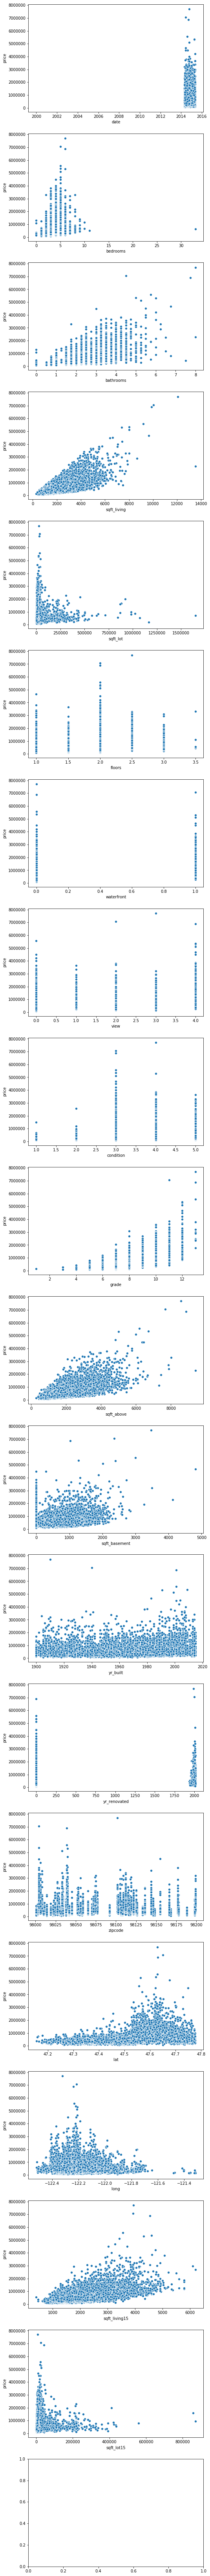

In [32]:
fig, ax = plt.subplots(nrows=20, ncols=1, figsize=(8, 120))
i=0 
for col in hdf.drop('price', axis=1).columns:
    #print(col)
    sns.scatterplot(hdf[col], hdf['price'], ax= ax[i])
    i += 1

In [33]:
correlation=hdf.corr()['price'].sort_values()

In [35]:
print("Most positive correltion: \n\n\n", correlation.tail(15))
print("Most negative correltion: \n", correlation.head(15))

Most positive correltion: 


 sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64
Most negative correltion: 
 zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
Name: price, dtype: float64


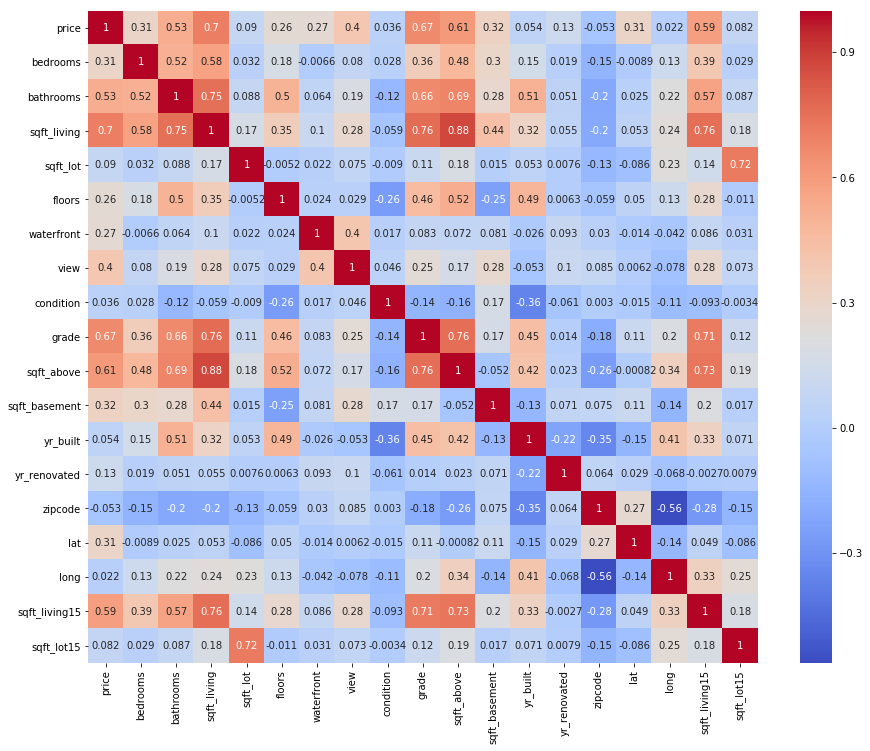

In [37]:

import seaborn as sns
fig = plt.figure(figsize=(15,12))
sns.heatmap(hdf.corr(), annot=True, cmap='coolwarm')

In [38]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [39]:
hdf['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [40]:
hdf['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [49]:
hdf[hdf['bedrooms'].isin([33,3])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
10,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
12,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
13,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [57]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [54]:
import sqlite3 as db
from pandasql import sqldf

In [55]:
conn = db.connect("sqladb.db")

In [56]:
hdf.to_sql("hprice", conn, if_exists="replace",index=False)

In [65]:
sql1="""
select avg(bedrooms) 
from hprice 
where floors = 1
and grade = 7
and (sqft_living > 1600 and sqft_living < 1650)
and (sqft_above > 1000 and sqft_above < 1050)
and bedrooms < 30
"""

pd.read_sql_query(sql1, conn)

,avg(bedrooms)
0,2.818182


In [71]:
hdf[hdf['bedrooms'] == 33]['bedrooms']

Series([], Name: bedrooms, dtype: int64)

In [70]:
hdf.loc[15870,'bedrooms'] = 3

In [78]:
sql1="""
select avg(bedrooms)
from hprice 
where floors = 2
and grade = 7
and (sqft_living > 2800 and sqft_living < 3200)
and (sqft_above > 2200 and sqft_above < 2500)
and bedrooms < 11
"""

pd.read_sql_query(sql1, conn)

,avg(bedrooms)
0,4.166667


In [72]:
#house[house.bedrooms ==33].bedrooms.value = 3

In [73]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [81]:
hdf.loc[8757,'bedrooms'] = 4

In [82]:
# house.at[house.index[house.bedrooms ==11],'bedrooms'] = 3

In [83]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [84]:
hdf['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [85]:
y=hdf['price']

In [94]:
x=hdf.drop(['price','date'],axis = 1)

In [95]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17290, 18)
(4323, 18)
(17290,)
(4323,)


In [96]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
lm.score(X_train,Y_train)

0.70019003325658891

In [98]:
lm.score(X_test,Y_test)

0.70000136401402768

In [100]:
from sklearn.metrics import r2_score

In [102]:
r2_score(Y_test,lm.predict(X_test))

0.70000136401402768

In [104]:
hdf['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [105]:
hdf.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

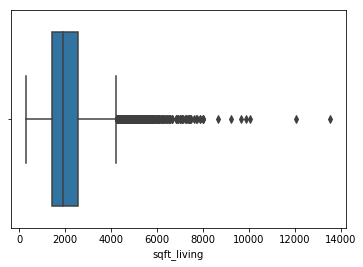

In [109]:
sns.boxplot(hdf['sqft_living'])

(array([  7.56900000e+03,   1.06810000e+04,   2.81400000e+03,
          4.41000000e+02,   7.70000000e+01,   2.40000000e+01,
          2.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([   290.,   1615.,   2940.,   4265.,   5590.,   6915.,   8240.,
          9565.,  10890.,  12215.,  13540.]),
 <a list of 10 Patch objects>)

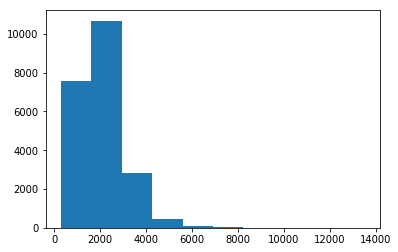

In [110]:
plt.hist(hdf['sqft_living'])

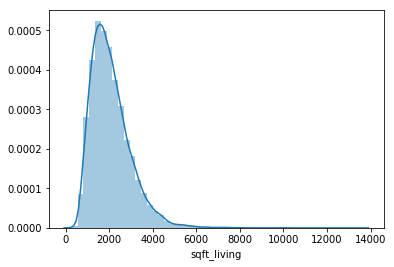

In [111]:
sns.distplot(hdf['sqft_living'])

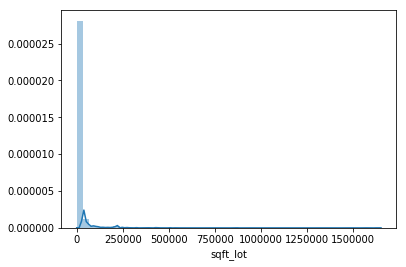

In [112]:
sns.distplot(hdf['sqft_lot'])

In [114]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [124]:
hdf['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [125]:
hdf['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [126]:
hdf['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [127]:
hdf['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [128]:
hdf['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [129]:
hdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [137]:
hdf["age"] = 2018 - np.where(hdf["yr_renovated"]==0,hdf["yr_built"],hdf["yr_renovated"])

In [ ]:
app_train = pd.get_dummies(app_train)
app_test =  pd.get_dummies(app_test)

print("Training Feature shape", app_train.shape)
print("Test Feature shape", app_test.shape)